## **Get Bitcoin Daily Simple Return**
---
Conditions:
*   BTC price 01.01.2018 - 31.12.2021


### 1. Libraries

In [2]:
#Import the libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [7]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [8]:
# b) Load the data from yahoofinance
df = yf.download("BTC-USD", start="2018-01-01", end="2021-12-31", interval = '1d')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520,2017-12-31
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,2018-01-01
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,2018-01-02
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,2018-01-03
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,2018-01-04


### 3. Close price and daily simple return

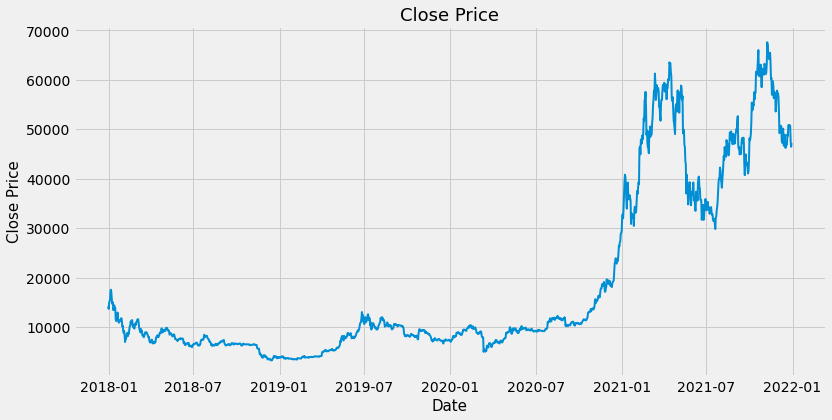

In [12]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

In [13]:
#Calculate and show the Daily Siple Return (DSR)
DSR = df['Close'].pct_change()
#Show the daily simple return
DSR.head()

2017-12-31         NaN
2018-01-01   -0.035263
2018-01-02    0.097011
2018-01-03    0.014611
2018-01-04    0.026196
Name: Close, dtype: float64

In [15]:
#Get  statistics on the Daily Simple Return
DSR.describe()

count    1460.000000
mean        0.001624
std         0.039628
min        -0.371695
25%        -0.015548
50%         0.001394
75%         0.018774
max         0.187465
Name: Close, dtype: float64

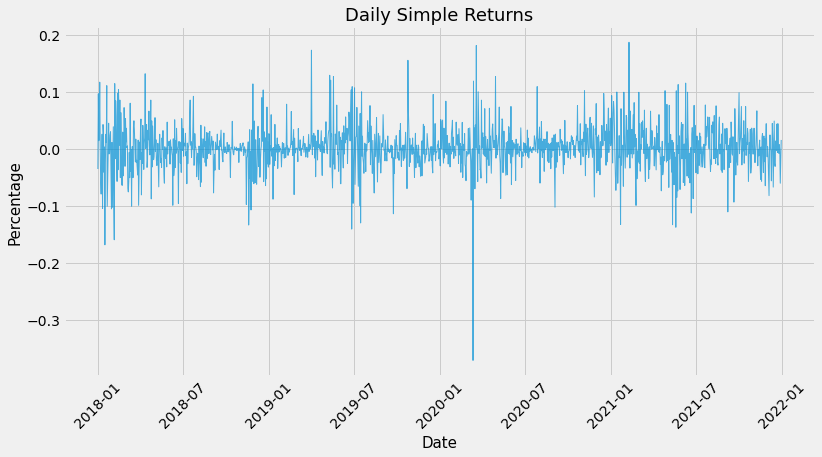

In [22]:
#Visually show and plot the daily simple returns
plt.figure(figsize=(12,6))
plt.title('Daily Simple Returns', fontsize=18)
plt.plot(DSR.index, DSR, label='DSR', linewidth=1, alpha=0.7)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

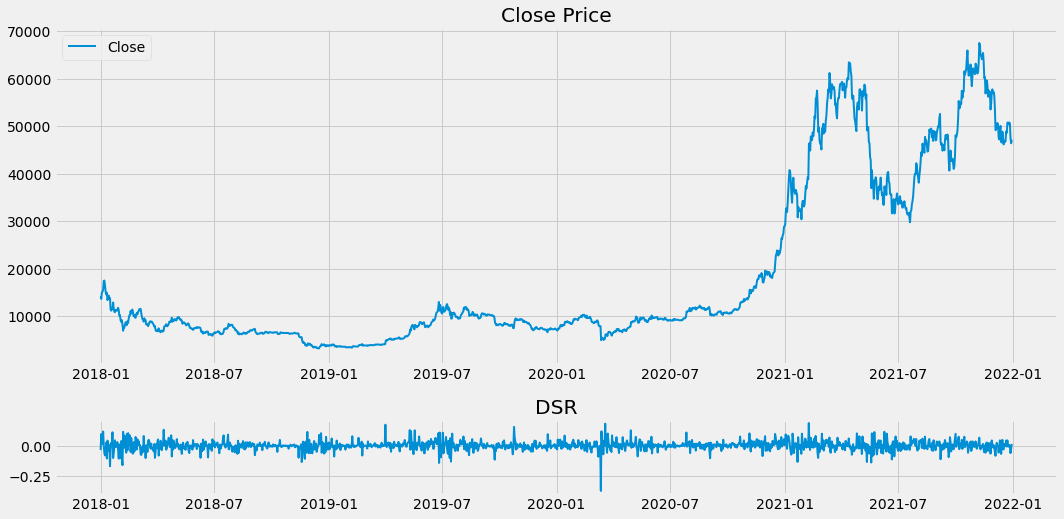

In [27]:
#Merging two charts together
#Plot the close price
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(df.index, df['Close'], label = 'Close', linewidth=2)
plt.title('Close Price')
plt.legend(loc='upper left')
#Plot the DSR
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.plot(DSR.index, DSR, linewidth=2)
plt.title('DSR')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(16,8)